# FINDING 1: Program's spiritual impact not correlated with happiness

The first finding was comparing the first and second survey. I subtracted the second survey from the first survey to find
significant differences between patients after the program from before the program. This compared the differences in:
1. pep
2. energy
3. happiness
4. whether they carry religion into their life
5. whether religion guides them
6. experiencing God's presence.

I wanted to use other comparisons like church attendance or depression but the variance was much lower.

The findings show that for patients, there was a correlation between a change in pep, happiness, and energy. Which makes sense,
less energy leads to more happiness most of the time so it would make sense for those to be correlated. However, there was no
correlation in changes in energy, happiness, and pep to changes in following religion closer or feeling God's presence.

 36_God_Presence   37_religion_guide  38_carry_religion_into_all_dealings
 Min.   :-3.0000   Min.   :-4.00000   Min.   :-4.00000                   
 1st Qu.: 1.0000   1st Qu.: 0.00000   1st Qu.: 0.00000                   
 Median : 1.0000   Median : 0.00000   Median : 0.00000                   
 Mean   : 0.9222   Mean   : 0.03333   Mean   :-0.03333                   
 3rd Qu.: 1.0000   3rd Qu.: 0.00000   3rd Qu.: 0.00000                   
 Max.   : 5.0000   Max.   : 3.00000   Max.   : 4.00000                   
     65_pep          69_energy       72_happy_person
 Min.   :-4.0000   Min.   :-5.0000   Min.   :-5.0   
 1st Qu.:-1.0000   1st Qu.:-1.0000   1st Qu.:-1.0   
 Median : 0.0000   Median :-1.0000   Median : 0.0   
 Mean   : 0.1111   Mean   :-0.8889   Mean   :-0.6   
 3rd Qu.: 1.0000   3rd Qu.: 0.0000   3rd Qu.: 0.0   
 Max.   : 5.0000   Max.   : 4.0000   Max.   : 4.0   

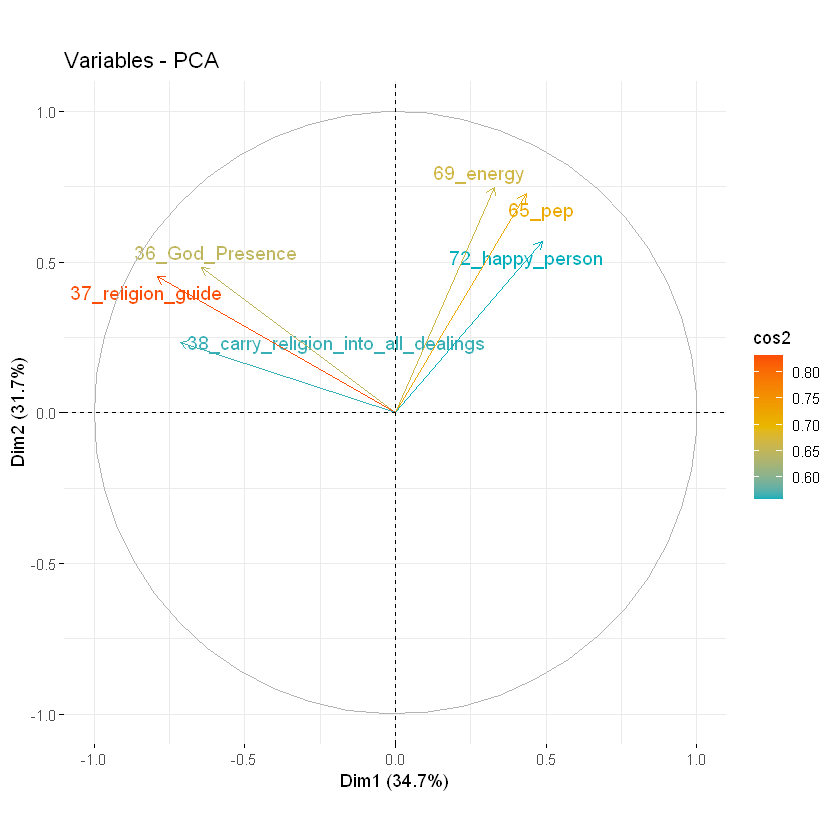

In [4]:
library(VIM)
library("dplyr")
         
survey1 <- read.csv("survey1.csv", header = TRUE, )
survey2 <- read.csv("survey2.csv", header = TRUE, )
         
# I did this in RStudio so I had to made the dataset similar to what I did in RStudio
# for the code to work. Here I change the name of the first column since it had a
# special character before.
colnames(survey1)[1] <- 'ID'
colnames(survey2)[1] <- 'ID'

# This assigns the row indexes to be the ID.
rownames(survey1) <- survey1$ID
rownames(survey2) <- survey2$ID
         
# This removes the ID column since we don't need it anymore.
survey1 <- survey1[-c(1)]
survey2 <- survey2[-c(1)]
         
# This selects the columns we need for the evaluation.
survey1_deleted <- survey1[c(40, 41, 42, 69, 73, 76)]
survey2_deleted <- survey2[c(41, 42, 43, 70, 74, 77)]

# The next couple lines transfer any character values to numeric by looping through
# each column.
column_types1 <- sapply(survey1_deleted, class)
column_types2 <- sapply(survey2_deleted, class)

non_numeric_columns1 <- names(column_types1[column_types1 != "numeric"])
non_numeric_columns2 <- names(column_types2[column_types2 != "numeric"])

for (col in non_numeric_columns1) {
  survey1_deleted[[col]] <- as.numeric(survey1_deleted[[col]])
}
for (col in non_numeric_columns1) {
  survey2_deleted[[col]] <- as.numeric(survey2_deleted[[col]])
}

# This removes any rows with null values and makes sure the column names are unique.
clean_base_1 <- survey1_deleted[complete.cases(survey1_deleted), , drop = FALSE]
clean_base_2 <- survey2_deleted[complete.cases(survey2_deleted), , drop = FALSE]
names(clean_base_1) <- make.unique(names(clean_base_1))
names(clean_base_2) <- make.unique(names(clean_base_2))

# Finds which rows are in both datasets.
matching_row_names1 <- rownames(clean_base_1) %in% rownames(clean_base_2)
only_matching1 <- clean_base_1[matching_row_names1, ]
matching_row_names2 <- rownames(clean_base_2) %in% rownames(clean_base_1)
only_matching2 <- clean_base_2[matching_row_names2, ]

# Gets the difference of the second survey and the first survey and stores it in
# final.
final <- only_matching2 - only_matching1
final <- final %>% 
  rename("36_God_Presence" = "X36_I_experience_the_God_presence",
         "37_religion_guide" = "X37_My_religious_beliefs.guide_my_approach_to_life",
         "38_carry_religion_into_all_dealings" = "X38_I_try_to_carry_my_religion_into_all_dealings_in_life",
         "65_pep" = "X65_Did_you_feel_full_of_pep",
         "69_energy" = "X69_Did_you_have_a_lot_of_energy",
         "72_happy_person" = "X72_Have_you_been_happy_person")
summary(final)

# PCA evaluation
library(factoextra)
res.pca <- prcomp(final, scale = TRUE)

fviz_pca_var(res.pca,
             col.var = "cos2", # Color by the quality of representation cos2
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     # Avoid text overlapping
)

The surveys seem to indicate that patients who leave feeling God's presence more, using religion to guide their life and in their everyday life, may not leave with more energy, pep, or happiness as a consequence of their change in spirituality. In conclusion, the program, if it does make a spiritual impact, does not make an impact on the person's happiness or energy.

# FINDING 2: Changes in diet are correlated with changes in depression and feeling accomplished. Exercising more is not correlated with changes in depression and feeling accomplished.

The second finding was also comparing the first and second survey. I subtracted the second survey from the first survey to find
significant differences between patients after the program from before the program. This compared the differences in:
1. food choices
2. depression
3. worry
4. feelings of accomplishment
5. exercise hours.

 X28B_How_many_minutes_engage_exercise 39_little_interest 40_feeling_depressed
 Min.   :-11.000                       Min.   :-5.000     Min.   :-5.000      
 1st Qu.:  0.000                       1st Qu.:-2.000     1st Qu.:-2.000      
 Median :  2.000                       Median :-1.000     Median :-1.000      
 Mean   :  2.906                       Mean   :-1.282     Mean   :-1.282      
 3rd Qu.:  7.000                       3rd Qu.:-1.000     3rd Qu.:-1.000      
 Max.   : 17.000                       Max.   : 2.000     Max.   : 1.000      
 42_cant_stop_worrying 60_accomplished_less 3B_fried_starchy_vegetables
 Min.   :-3.0000       Min.   :-1.0000      Min.   :-2.00000           
 1st Qu.:-1.0000       1st Qu.: 0.0000      1st Qu.:-0.14286           
 Median : 0.0000       Median : 0.0000      Median :-0.03333           
 Mean   :-0.3529       Mean   : 0.2471      Mean   :-0.08415           
 3rd Qu.: 0.0000       3rd Qu.: 1.0000      3rd Qu.: 0.00000           
 Max.   : 2.000

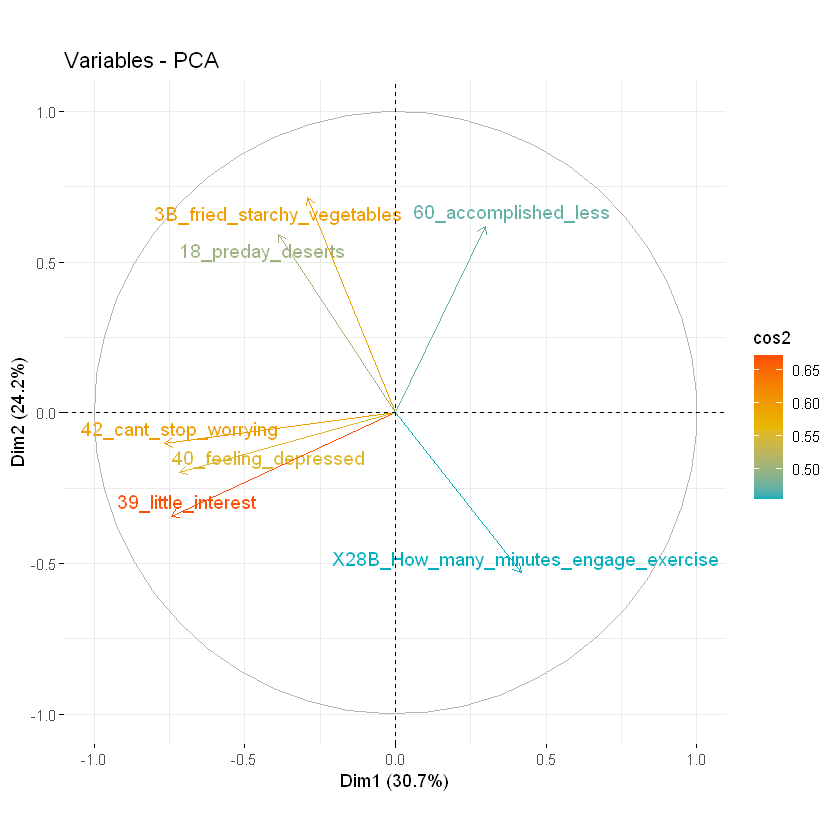

In [5]:
library(VIM)
library("dplyr")


survey1 <- read.csv("survey1.csv", header = TRUE, )
survey2 <- read.csv("survey2.csv", header = TRUE, )
         
# I did this in RStudio so I had to made the dataset similar to what I did in RStudio
# for the code to work. Here I change the name of the first column since it had a
# special character before.
colnames(survey1)[1] <- 'ID'
colnames(survey2)[1] <- 'ID'

# This assigns the row indexes to be the ID.
rownames(survey1) <- survey1$ID
rownames(survey2) <- survey2$ID

# This removes the ID column since we don't need it anymore.
survey1 <- survey1[-c(1)]
survey2 <- survey2[-c(1)]

# This selects the columns we need for the evaluation.
survey1_deleted <- survey1[c(32, 43, 44, 46, 64, 86, 103)]
survey2_deleted <- survey2[c(33, 44, 45, 47, 65, 87, 104 )]

# The next couple lines transfer any character values to numeric by looping through
# each column.
column_types1 <- sapply(survey1_deleted, class)
column_types2 <- sapply(survey2_deleted, class)

non_numeric_columns1 <- names(column_types1[column_types1 != "numeric"])
non_numeric_columns2 <- names(column_types2[column_types2 != "numeric"])

for (col in non_numeric_columns1) {
  survey1_deleted[[col]] <- as.numeric(survey1_deleted[[col]])
}
for (col in non_numeric_columns1) {
  survey2_deleted[[col]] <- as.numeric(survey2_deleted[[col]])
}

# This removes any rows with null values and makes sure the column names are unique.
clean_base_1 <- survey1_deleted[complete.cases(survey1_deleted), , drop = FALSE]
clean_base_2 <- survey2_deleted[complete.cases(survey2_deleted), , drop = FALSE]
names(clean_base_1) <- make.unique(names(clean_base_1))
names(clean_base_2) <- make.unique(names(clean_base_2))

# Finds which rows are in both datasets.
matching_row_names1 <- rownames(clean_base_1) %in% rownames(clean_base_2)
only_matching1 <- clean_base_1[matching_row_names1, ]
matching_row_names2 <- rownames(clean_base_2) %in% rownames(clean_base_1)
only_matching2 <- clean_base_2[matching_row_names2, ]

# Gets the difference of the second survey and the first survey and stores it in
# final.
final <- only_matching2 - only_matching1
final <- final %>% 
  rename(#"32_use_cigarettes" = "X32_Use_cigarettes_e.cigarettes_marijuana_cigars_chew_snuff",
         #"33_cigarette_daily_amount" = "X33_How_many_cigarettes_smoke_daily",
         "39_little_interest" = "X39_Little_interest_or_pleasure_in_doing_things",
         "40_feeling_depressed" = "X40_Feeling_down_depressed_.or.hopeless",
         "42_cant_stop_worrying" = "X42_Not_being_able_to_stop_or_control_worrying",
         #"59_cut_down_work" = "X59_Cut_down_the_amount_of_time_you_spent_on_work",
         "60_accomplished_less" = "X60_Accomplished_less_than_you_would_like",
         #"62_extent_of_emotional_health_problems_impacting_social_life" = 
              #"X62_Has_your_physical_health_or_emotional_problems_interfered_with_your_normal_social",
         #"70_downhearted" = "X70_Have_you_felt_downhearted",
         "3B_fried_starchy_vegetables" = "X3B_perday_fried_starchy_vegetables",
         "18_preday_deserts" = "X18_perday_pastries_cookies_cakes_ice.cream"
         )
summary(final)

# PCA evaluation
library(factoextra)
res.pca <- prcomp(final, scale = TRUE)

fviz_pca_var(res.pca,
             col.var = "cos2", # Color by the quality of representation cos2
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     # Avoid text overlapping
)

The findings show that for patients, there was more of a correlation between changes in diet choices and mental health than
changes in hours spent exercising. There was also a higher correlation between diet choices and feeling accomplished with work 
than in hours spent exercising. This implies diet is more important to changing depression/anxiety and feeling accomplished 
with work than changing habits in exercise.

What is odd is that it it shows there is no correlation between anxiety/depression and feeling accomplished or not. Which
probably has to do with some people finding a lack of accomplishment as something to fix and not something to worry or be sad
about.

# FINDING 3: Changes in BMI is correlated more with changes in diet than changes in walking habits.

The last finding was also comparing the differences between the second and first survey. This time I compared it to the 
differences in the vitals. I subtracted the second survey from the first survey to find significant differences between patients
after the program from before the program. Then I compared these differences to the vital signs, specifically the subtraction of
BMI1 from BMI2. This compared:
1. diet, 
2. BMI
3. how much walking was done.

 52_Walking_several_blocks 51_Walking_more_than_a_mile  19_Fast_food     
 Min.   :-2.0000           Min.   :-1.0000             Min.   :-0.57143  
 1st Qu.: 0.0000           1st Qu.: 0.0000             1st Qu.:-0.09167  
 Median : 0.0000           Median : 0.0000             Median : 0.00000  
 Mean   : 0.4487           Mean   : 0.5513             Mean   :-0.08046  
 3rd Qu.: 1.0000           3rd Qu.: 1.0000             3rd Qu.: 0.00000  
 Max.   : 2.0000           Max.   : 2.0000             Max.   : 0.14286  
  11_Red_meat        18_Desserts         BMI_diff     
 Min.   :-2.00000   Min.   :-3.9333   Min.   :-65.77  
 1st Qu.:-0.05833   1st Qu.:-0.2857   1st Qu.:-22.96  
 Median : 0.00000   Median : 0.0000   Median :-21.08  
 Mean   :-0.10958   Mean   :-0.2772   Mean   :-22.35  
 3rd Qu.: 0.00000   3rd Qu.: 0.0000   3rd Qu.:-19.46  
 Max.   : 0.00000   Max.   : 0.1429   Max.   :-16.79  

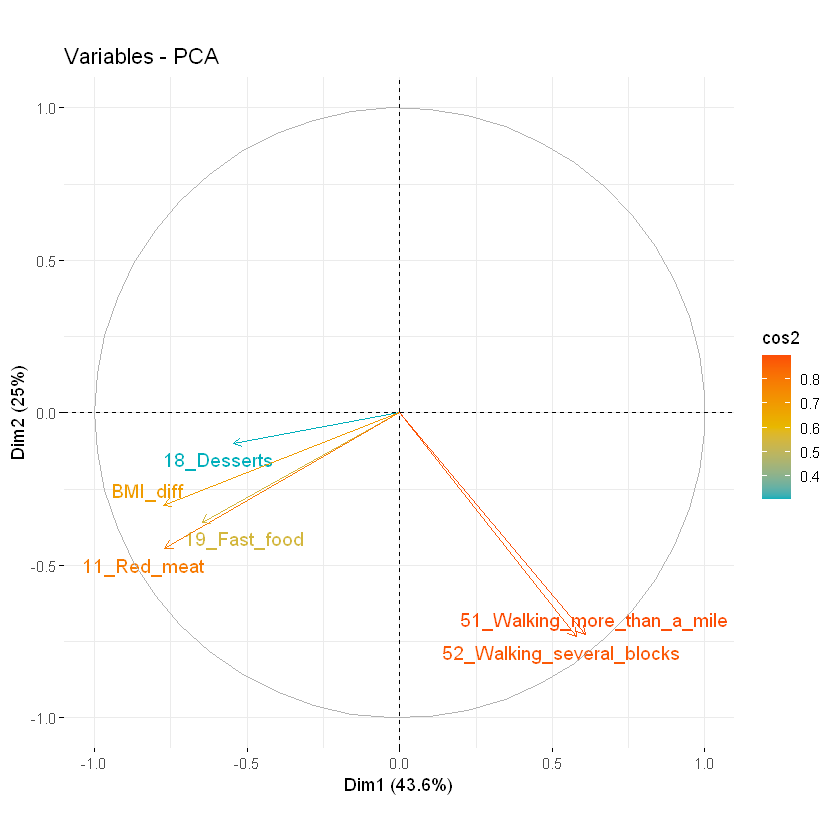

In [6]:
library(VIM)
library("dplyr")

survey1 <- read.csv("survey1.csv", header = TRUE, )
survey2 <- read.csv("survey2.csv", header = TRUE, )
         
# I did this in RStudio so I had to made the dataset similar to what I did in RStudio
# for the code to work. Here I change the name of the first column since it had a
# special character before.
colnames(survey1)[1] <- 'ID'
colnames(survey2)[1] <- 'ID'

# This assigns the row indexes to be the ID.
rownames(survey1) <- survey1$ID
rownames(survey2) <- survey2$ID
      
# This removes the ID column since we don't need it anymore.
survey1 <- survey1[-c(1)]
survey2 <- survey2[-c(1)]

# This selects the columns we need for the evaluation.
survey1_deleted <- survey1[c(56, 55, 104, 96, 103)]
survey2_deleted <- survey2[c(57, 56, 105, 97, 104)]

# The next couple lines transfer any character values to numeric by looping through
# each column.
column_types1 <- sapply(survey1_deleted, class)
column_types2 <- sapply(survey2_deleted, class)

non_numeric_columns1 <- names(column_types1[column_types1 != "numeric"])
non_numeric_columns2 <- names(column_types2[column_types2 != "numeric"])

for (col in non_numeric_columns1) {
  survey1_deleted[[col]] <- as.numeric(survey1_deleted[[col]])
}
for (col in non_numeric_columns1) {
  survey2_deleted[[col]] <- as.numeric(survey2_deleted[[col]])
}

# This removes any rows with null values and makes sure the column names are unique.
clean_base_1 <- survey1_deleted[complete.cases(survey1_deleted), , drop = FALSE]
clean_base_2 <- survey2_deleted[complete.cases(survey2_deleted), , drop = FALSE]
names(clean_base_1) <- make.unique(names(clean_base_1))
names(clean_base_2) <- make.unique(names(clean_base_2))

# Finds which rows are in both datasets.
matching_row_names1 <- rownames(clean_base_1) %in% rownames(clean_base_2)
only_matching1 <- clean_base_1[matching_row_names1, ]
matching_row_names2 <- rownames(clean_base_2) %in% rownames(clean_base_1)
only_matching2 <- clean_base_2[matching_row_names2, ]

# Gets the difference of the second survey and the first survey and stores it in
# surveys.
surveys <- only_matching2 - only_matching1

vital.signs <- read.csv("vital-signs.csv", header = TRUE, )
         
# I did this in RStudio so I had to made the dataset similar to what I did in RStudio
# for the code to work. Here I change the name of the first column since it had a
# special character before.
colnames(vital.signs)[1] <- 'ID'

# This assigns the row indexes to be the ID.
rownames(vital.signs) <- vital.signs$ID
      
# This removes the ID column since we don't need it anymore.
vital.signs <- vital.signs[-c(1)]

# Follow up survey has too much unknown answers so I got rid of those columns.
new_vitals_df1 <- vital.signs[, !(names(vital.signs) %in% 
                                    c("BMI1", "BMI2", "BMI3", 
                                      "Days.btwn.baseline.and.F.U.Wt", "SBP3",
                                      "DBP3", "Days.btwn.baseline.and.F.U.BP", 
                                      "Wt..lbs.3", "Session.type" ))]
# Change any value of string "n/a" to NA.
new_vitals_df1[new_vitals_df1 == "n/a"] <- NA

# The next couple lines transfer any character values to numeric by looping through
# each column.
column_types1 <- sapply(new_vitals_df1, class)

non_numeric_columns1 <- names(column_types1[column_types1 != "numeric"])

for (col in non_numeric_columns1) {
  new_vitals_df1 [[col]] <- as.numeric(new_vitals_df1[[col]])
}

# This removes any rows with null values.
cleaned_vitals <- new_vitals_df1[complete.cases(new_vitals_df1), , drop = FALSE]
# These next lines mutate the dataframe to include a BMI and a difference between
# any of the variables you want to analyze.
cleaned_vitals <- mutate(cleaned_vitals, BMI1 = Wt..lbs.1 / Intake_Height^2 * 703)
cleaned_vitals <- mutate(cleaned_vitals, BMI2 = Wt..lbs.2 / Intake_Height^2 * 703)
cleaned_vitals <- mutate(cleaned_vitals, BMI_diff = BMI2 - BMI1)
#cleaned_vitals <- mutate(cleaned_vitals, SBP_diff = SBP2 - SBP1)
#cleaned_vitals <- mutate(cleaned_vitals, DBP_diff = DBP2 - DBP1)
#cleaned_vitals <- mutate(cleaned_vitals, Wt_diff =  Wt..lbs.2 - Wt..lbs.1)
#cleaned_vitals <- mutate(cleaned_vitals, WC_diff =  WC.2 - WC1)

# This got rid of some of the variables with low variances.
cleaned_vitals <- cleaned_vitals[, !(names(cleaned_vitals) %in% 
                     c("SBP1", "SBP2", "DBP1", "DBP2", "BMI1", "BMI2", 
                       "Wt..lbs.1", "Wt..lbs.2", "WC1", "WC.2",
                       "Intake_Height"
                     ))]

# The next couple lines merge the surveys and the vitals by ID.
final <- merge(surveys, cleaned_vitals, by=0, all=TRUE)
final_cleaned <- final[complete.cases(final), , drop = FALSE][-1]

final_cleaned <- final_cleaned %>% 
  rename("52_Walking_several_blocks" = "X52_Walking_several_blocks",
    "51_Walking_more_than_a_mile" = "X51_Walking_more_than_a_mile",
    "19_Fast_food" = "X19_perday_times_eat_in_fast.food_restaurant",
    "11_Red_meat" = "X11_perday_red_meat",
    "18_Desserts" = "X18_perday_pastries_cookies_cakes_ice.cream",
  )
final_cleaned <- final_cleaned[, !(names(final_cleaned) %in% 
                                       c("Program.length"
                                       ))]
summary(final_cleaned)

# PCA evaluation
library(factoextra)
res.pca <- prcomp(final_cleaned, scale = TRUE)

fviz_pca_var(res.pca,
             col.var = "cos2", # Color by the quality of representation cos2
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     # Avoid text overlapping
)

The findings show that for patients, there was more of a correlation between changes in BMI and diet choices. Patients change in frequency of going to fast food places and frequency of eating red meat and desserts impacted BMI the msot. Changes in BMI
was not correlated with changes in walking habits. 

# QUESTIONS:

This code, BEFORE YOU RUN IT, just so you know writes a csv file in the current directory. This csv file contains the survey1
with some changes. First, there is a mean for every column. Second, there is a change in the question 24 to be changed into
3 columns containing "breakfast", "lunch", and "dinner". 1 means the patient does have meal during that time and 0 means the
patient does not. Question 31 was changed to military time. This was done with all the surveys.

In [104]:
library("dplyr")

survey1 <- read.csv("survey1.csv", header = TRUE, )

survey1_deleted <- survey1[-c(1:26)]

survey1_deleted$X31_Over_last_two_weeks_when_gone_to_bed <- 
  format(strptime(
    survey1_deleted$X31_Over_last_two_weeks_when_gone_to_bed, "%I%p"
  ), format="%H")


survey1_deleted <- survey1_deleted %>%
  mutate(breakfast = ifelse(
    X24_Which_meals_eat_everyday %in% c('1', '1_2', '1_3', '1_2_3'),
    1, ifelse(X24_Which_meals_eat_everyday %in% 
                c('1', '2', '3', '1_2', '1_3', '2_3', '1_2_3'), 0, NA)
  ))

survey1_deleted <- survey1_deleted %>%
  mutate(lunch = ifelse(
    X24_Which_meals_eat_everyday %in% c('2', '1_2', '2_3', '1_2_3'),
    1, ifelse(X24_Which_meals_eat_everyday %in% 
                c('1', '2', '3', '1_2', '1_3', '2_3', '1_2_3'), 0, NA)
  ))

survey1_deleted <- survey1_deleted %>%
  mutate(dinner = ifelse(
    X24_Which_meals_eat_everyday %in% c('3', '1_3', '2_3', '1_2_3'),
    1, ifelse(X24_Which_meals_eat_everyday %in% 
                c('1', '2', '3', '1_2', '1_3', '2_3', '1_2_3'), 0, NA)
  ))


survey1_deleted <- survey1_deleted[, !(names(survey1_deleted) %in% 
                                         c("X24_Which_meals_eat_everyday"))]

survey1_deleted <- survey1_deleted %>%
  select(dinner, everything())
survey1_deleted <- survey1_deleted %>%
  select(lunch, everything())
survey1_deleted <- survey1_deleted %>%
  select(breakfast, everything())


column_types1 <- sapply(survey1_deleted, class)

non_numeric_columns1 <- names(column_types1[column_types1 != "numeric"])

for (col in non_numeric_columns1) {
  survey1_deleted[[col]] <- as.numeric(survey1_deleted[[col]])
}

survey1_deleted <- rbind(survey1_deleted, colMeans = colMeans(survey1_deleted, na.rm = TRUE))

#numeric_means <- colMeans(final, na.rm = TRUE)
#final_with_means <- rbind(final, colMeans = numeric_means)

final <- cbind(ID = rownames(survey1_deleted), survey1_deleted)
rownames(final) <- 1:nrow(final)

write.csv(final, file='survey1-means.csv', row.names=FALSE)


This is the same thing except for survey2

In [108]:
library("dplyr")

survey2 <- read.csv("survey2.csv", header = TRUE, )

survey1_deleted <- survey2[-c(1:26)]

survey1_deleted$X31_Over_last_two_weeks_when_gone_to_bed <- 
  format(strptime(
    survey1_deleted$X31_Over_last_two_weeks_when_gone_to_bed, "%I%p"
  ), format="%H")


survey1_deleted <- survey1_deleted %>%
  mutate(breakfast = ifelse(
    X24_Which_meals_eat_everyday %in% c('1', '1_2', '1_3', '1_2_3'),
    1, ifelse(X24_Which_meals_eat_everyday %in% 
                c('1', '2', '3', '1_2', '1_3', '2_3', '1_2_3'), 0, NA)
  ))

survey1_deleted <- survey1_deleted %>%
  mutate(lunch = ifelse(
    X24_Which_meals_eat_everyday %in% c('2', '1_2', '2_3', '1_2_3'),
    1, ifelse(X24_Which_meals_eat_everyday %in% 
                c('1', '2', '3', '1_2', '1_3', '2_3', '1_2_3'), 0, NA)
  ))

survey1_deleted <- survey1_deleted %>%
  mutate(dinner = ifelse(
    X24_Which_meals_eat_everyday %in% c('3', '1_3', '2_3', '1_2_3'),
    1, ifelse(X24_Which_meals_eat_everyday %in% 
                c('1', '2', '3', '1_2', '1_3', '2_3', '1_2_3'), 0, NA)
  ))


survey1_deleted <- survey1_deleted[, !(names(survey1_deleted) %in% 
                                         c("X24_Which_meals_eat_everyday"))]

survey1_deleted <- survey1_deleted %>%
  select(dinner, everything())
survey1_deleted <- survey1_deleted %>%
  select(lunch, everything())
survey1_deleted <- survey1_deleted %>%
  select(breakfast, everything())


column_types1 <- sapply(survey1_deleted, class)

non_numeric_columns1 <- names(column_types1[column_types1 != "numeric"])

for (col in non_numeric_columns1) {
  survey1_deleted[[col]] <- as.numeric(survey1_deleted[[col]])
}

survey1_deleted <- rbind(survey1_deleted, colMeans = colMeans(survey1_deleted, na.rm = TRUE))

#numeric_means <- colMeans(final, na.rm = TRUE)
#final_with_means <- rbind(final, colMeans = numeric_means)

final <- cbind(ID = rownames(survey1_deleted), survey1_deleted)
rownames(final) <- 1:nrow(final)

write.csv(final, file='survey2-means.csv', row.names=FALSE)

This does the same except for survey 3

In [112]:
library("dplyr")

survey3 <- read.csv("survey3.csv", header = TRUE, )

survey1_deleted <- survey3[-c(1:26)]

survey1_deleted$X31_Over_last_two_weeks_when_gone_to_bed <- 
  format(strptime(
    survey1_deleted$X31_Over_last_two_weeks_when_gone_to_bed, "%I%p"
  ), format="%H")


survey1_deleted <- survey1_deleted %>%
  mutate(breakfast = ifelse(
    X24_Which_meals_eat_everyday %in% c('1', '1_2', '1_3', '1_2_3'),
    1, ifelse(X24_Which_meals_eat_everyday %in% 
                c('1', '2', '3', '1_2', '1_3', '2_3', '1_2_3'), 0, NA)
  ))

survey1_deleted <- survey1_deleted %>%
  mutate(lunch = ifelse(
    X24_Which_meals_eat_everyday %in% c('2', '1_2', '2_3', '1_2_3'),
    1, ifelse(X24_Which_meals_eat_everyday %in% 
                c('1', '2', '3', '1_2', '1_3', '2_3', '1_2_3'), 0, NA)
  ))

survey1_deleted <- survey1_deleted %>%
  mutate(dinner = ifelse(
    X24_Which_meals_eat_everyday %in% c('3', '1_3', '2_3', '1_2_3'),
    1, ifelse(X24_Which_meals_eat_everyday %in% 
                c('1', '2', '3', '1_2', '1_3', '2_3', '1_2_3'), 0, NA)
  ))


survey1_deleted <- survey1_deleted[, !(names(survey1_deleted) %in% 
                                         c("X24_Which_meals_eat_everyday"))]

survey1_deleted <- survey1_deleted %>%
  select(dinner, everything())
survey1_deleted <- survey1_deleted %>%
  select(lunch, everything())
survey1_deleted <- survey1_deleted %>%
  select(breakfast, everything())


column_types1 <- sapply(survey1_deleted, class)

non_numeric_columns1 <- names(column_types1[column_types1 != "numeric"])

for (col in non_numeric_columns1) {
  survey1_deleted[[col]] <- as.numeric(survey1_deleted[[col]])
}

survey1_deleted <- rbind(survey1_deleted, colMeans = colMeans(survey1_deleted, na.rm = TRUE))

#numeric_means <- colMeans(final, na.rm = TRUE)
#final_with_means <- rbind(final, colMeans = numeric_means)

final <- cbind(ID = rownames(survey1_deleted), survey1_deleted)
rownames(final) <- 1:nrow(final)

write.csv(final, file='survey3-means.csv', row.names=FALSE)

This subtracts survey1 from survey2. And then it does the same as before, setting military times, splitting question 24 into 3 columns, and showing the means of the differences. This way you can find the average change in each question from the baseline and the end of the program.

In [116]:
library("dplyr")

survey1 <- read.csv("survey1.csv", header = TRUE, )
survey2 <- read.csv("survey2.csv", header = TRUE, )

survey1_deleted <- survey1[-c(1:26)]
survey2_deleted <- survey2[-c(1:27)]

survey1_deleted$X31_Over_last_two_weeks_when_gone_to_bed <- 
  format(strptime(
    survey1_deleted$X31_Over_last_two_weeks_when_gone_to_bed, "%I%p"
    ), format="%H")
survey2_deleted$X31_Over_last_two_weeks_when_gone_to_bed <- 
  format(strptime(
    survey2_deleted$X31_Over_last_two_weeks_when_gone_to_bed, "%I%p"
    ), format="%H")


survey1_deleted <- survey1_deleted %>%
  mutate(breakfast = ifelse(
    X24_Which_meals_eat_everyday %in% c('1', '1_2', '1_3', '1_2_3'),
    1, ifelse(X24_Which_meals_eat_everyday %in% 
                c('1', '2', '3', '1_2', '1_3', '2_3', '1_2_3'), 0, NA)
  ))
survey2_deleted <- survey2_deleted %>%
  mutate(breakfast = ifelse(
    X24_Which_meals_eat_everyday %in% c('1', '1_2', '1_3', '1_2_3'),
    1, ifelse(X24_Which_meals_eat_everyday %in% 
                c('1', '2', '3', '1_2', '1_3', '2_3', '1_2_3'), 0, NA)
  ))

survey1_deleted <- survey1_deleted %>%
  mutate(lunch = ifelse(
    X24_Which_meals_eat_everyday %in% c('2', '1_2', '2_3', '1_2_3'),
    1, ifelse(X24_Which_meals_eat_everyday %in% 
                c('1', '2', '3', '1_2', '1_3', '2_3', '1_2_3'), 0, NA)
  ))
survey2_deleted <- survey2_deleted %>%
  mutate(lunch = ifelse(
    X24_Which_meals_eat_everyday %in% c('2', '1_2', '2_3', '1_2_3'),
    1, ifelse(X24_Which_meals_eat_everyday %in% 
                c('1', '2', '3', '1_2', '1_3', '2_3', '1_2_3'), 0, NA)
  ))

survey1_deleted <- survey1_deleted %>%
  mutate(dinner = ifelse(
    X24_Which_meals_eat_everyday %in% c('3', '1_3', '2_3', '1_2_3'),
    1, ifelse(X24_Which_meals_eat_everyday %in% 
                c('1', '2', '3', '1_2', '1_3', '2_3', '1_2_3'), 0, NA)
  ))
survey2_deleted <- survey2_deleted %>%
  mutate(dinner = ifelse(
    X24_Which_meals_eat_everyday %in% c('3', '1_3', '2_3', '1_2_3'),
    1, ifelse(X24_Which_meals_eat_everyday %in% 
                c('1', '2', '3', '1_2', '1_3', '2_3', '1_2_3'), 0, NA)
  ))


survey1_deleted <- survey1_deleted[, !(names(survey1_deleted) %in% 
                                       c("X24_Which_meals_eat_everyday"))]
survey2_deleted <- survey2_deleted[, !(names(survey2_deleted) %in% 
                                         c("X24_Which_meals_eat_everyday"))]

survey1_deleted <- survey1_deleted %>%
  select(dinner, everything())
survey1_deleted <- survey1_deleted %>%
  select(lunch, everything())
survey1_deleted <- survey1_deleted %>%
  select(breakfast, everything())

survey2_deleted <- survey2_deleted %>%
  select(dinner, everything())
survey2_deleted <- survey2_deleted %>%
  select(lunch, everything())
survey2_deleted <- survey2_deleted %>%
  select(breakfast, everything())


column_types1 <- sapply(survey1_deleted, class)
column_types2 <- sapply(survey2_deleted, class)

non_numeric_columns1 <- names(column_types1[column_types1 != "numeric"])
non_numeric_columns2 <- names(column_types2[column_types2 != "numeric"])

for (col in non_numeric_columns1) {
  survey1_deleted[[col]] <- as.numeric(survey1_deleted[[col]])
}
for (col in non_numeric_columns1) {
  survey2_deleted[[col]] <- as.numeric(survey2_deleted[[col]])
}

matching_row_names1 <- rownames(survey1_deleted) %in% rownames(survey2_deleted)
only_matching1 <- survey1_deleted[matching_row_names1, ]
matching_row_names2 <- rownames(survey2_deleted) %in% rownames(survey1_deleted)
only_matching2 <- survey2_deleted[matching_row_names2, ]

final <- only_matching2 - only_matching1

final <- rbind(final, colMeans = colMeans(final, na.rm = TRUE))

#numeric_means <- colMeans(final, na.rm = TRUE)
#final_with_means <- rbind(final, colMeans = numeric_means)

final <- cbind(ID = rownames(final), final)
rownames(final) <- 1:nrow(final)

write.csv(final, file='surveys1-and-2-differences.csv', row.names=FALSE)

This is the same as above but we subtract the follow-up survey from the baseline this time.

In [117]:
library("dplyr")

survey1 <- read.csv("survey1.csv", header = TRUE, )
survey2 <- read.csv("survey3.csv", header = TRUE, )

survey1_deleted <- survey1[-c(1:26)]
survey2_deleted <- survey2[-c(1:27)]

survey1_deleted$X31_Over_last_two_weeks_when_gone_to_bed <- 
  format(strptime(
    survey1_deleted$X31_Over_last_two_weeks_when_gone_to_bed, "%I%p"
    ), format="%H")
survey2_deleted$X31_Over_last_two_weeks_when_gone_to_bed <- 
  format(strptime(
    survey2_deleted$X31_Over_last_two_weeks_when_gone_to_bed, "%I%p"
    ), format="%H")


survey1_deleted <- survey1_deleted %>%
  mutate(breakfast = ifelse(
    X24_Which_meals_eat_everyday %in% c('1', '1_2', '1_3', '1_2_3'),
    1, ifelse(X24_Which_meals_eat_everyday %in% 
                c('1', '2', '3', '1_2', '1_3', '2_3', '1_2_3'), 0, NA)
  ))
survey2_deleted <- survey2_deleted %>%
  mutate(breakfast = ifelse(
    X24_Which_meals_eat_everyday %in% c('1', '1_2', '1_3', '1_2_3'),
    1, ifelse(X24_Which_meals_eat_everyday %in% 
                c('1', '2', '3', '1_2', '1_3', '2_3', '1_2_3'), 0, NA)
  ))

survey1_deleted <- survey1_deleted %>%
  mutate(lunch = ifelse(
    X24_Which_meals_eat_everyday %in% c('2', '1_2', '2_3', '1_2_3'),
    1, ifelse(X24_Which_meals_eat_everyday %in% 
                c('1', '2', '3', '1_2', '1_3', '2_3', '1_2_3'), 0, NA)
  ))
survey2_deleted <- survey2_deleted %>%
  mutate(lunch = ifelse(
    X24_Which_meals_eat_everyday %in% c('2', '1_2', '2_3', '1_2_3'),
    1, ifelse(X24_Which_meals_eat_everyday %in% 
                c('1', '2', '3', '1_2', '1_3', '2_3', '1_2_3'), 0, NA)
  ))

survey1_deleted <- survey1_deleted %>%
  mutate(dinner = ifelse(
    X24_Which_meals_eat_everyday %in% c('3', '1_3', '2_3', '1_2_3'),
    1, ifelse(X24_Which_meals_eat_everyday %in% 
                c('1', '2', '3', '1_2', '1_3', '2_3', '1_2_3'), 0, NA)
  ))
survey2_deleted <- survey2_deleted %>%
  mutate(dinner = ifelse(
    X24_Which_meals_eat_everyday %in% c('3', '1_3', '2_3', '1_2_3'),
    1, ifelse(X24_Which_meals_eat_everyday %in% 
                c('1', '2', '3', '1_2', '1_3', '2_3', '1_2_3'), 0, NA)
  ))


survey1_deleted <- survey1_deleted[, !(names(survey1_deleted) %in% 
                                       c("X24_Which_meals_eat_everyday"))]
survey2_deleted <- survey2_deleted[, !(names(survey2_deleted) %in% 
                                         c("X24_Which_meals_eat_everyday"))]

survey1_deleted <- survey1_deleted %>%
  select(dinner, everything())
survey1_deleted <- survey1_deleted %>%
  select(lunch, everything())
survey1_deleted <- survey1_deleted %>%
  select(breakfast, everything())

survey2_deleted <- survey2_deleted %>%
  select(dinner, everything())
survey2_deleted <- survey2_deleted %>%
  select(lunch, everything())
survey2_deleted <- survey2_deleted %>%
  select(breakfast, everything())


column_types1 <- sapply(survey1_deleted, class)
column_types2 <- sapply(survey2_deleted, class)

non_numeric_columns1 <- names(column_types1[column_types1 != "numeric"])
non_numeric_columns2 <- names(column_types2[column_types2 != "numeric"])

for (col in non_numeric_columns1) {
  survey1_deleted[[col]] <- as.numeric(survey1_deleted[[col]])
}
for (col in non_numeric_columns1) {
  survey2_deleted[[col]] <- as.numeric(survey2_deleted[[col]])
}

matching_row_names1 <- rownames(survey1_deleted) %in% rownames(survey2_deleted)
only_matching1 <- survey1_deleted[matching_row_names1, ]
matching_row_names2 <- rownames(survey2_deleted) %in% rownames(survey1_deleted)
only_matching2 <- survey2_deleted[matching_row_names2, ]

final <- only_matching2 - only_matching1

final <- rbind(final, colMeans = colMeans(final, na.rm = TRUE))

#numeric_means <- colMeans(final, na.rm = TRUE)
#final_with_means <- rbind(final, colMeans = numeric_means)

final <- cbind(ID = rownames(final), final)
rownames(final) <- 1:nrow(final)

write.csv(final, file='surveys1-and-3-differences.csv', row.names=FALSE)